In [1]:
import os
import sys
sys.path.append(os.path.abspath('../src'))
print(os.path.abspath('../src'))
# sys.path.append(os.path.abspath('../lv_seg/'))
from dataset.data_loader import EchoNetDataLoader
from utils import load_config_file
# from echotrain.utils import load_config_file
from dataset.aug import Aug
from dataset.preprocessing import PreprocessorTF
import pytest
import matplotlib.pyplot as plt
import numpy as np

D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\lv-seg\src
D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\src


In [2]:
root_dir = os.path.abspath(os.curdir)
if 'lv-seg' not in root_dir:
    root_dir = os.path.join(root_dir, 'lv-seg').replace('\\', '/')
config_path = os.path.join(root_dir, "../runs/template/config.yaml")
config = load_config_file(config_path)
print(config_path)

D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\lv-seg\notebooks\../runs/template/config.yaml


In [3]:
data_dir = 'D:\AIMedic\FinalProject_echocardiogram\echoC_Dataset\echonet_dynamic\EchoNet-Dynamic'
dataset_obj = EchoNetDataLoader(data_dir, config)
train_gen, train_n = dataset_obj.create_training_generator()
val_gen, val_n = dataset_obj.create_validation_generator()
test_gen, test_n = dataset_obj.create_test_generator()

In [4]:
print(train_n)
print(val_n)
print(test_n)

14920
2576
2552


0
112
(112, 112)


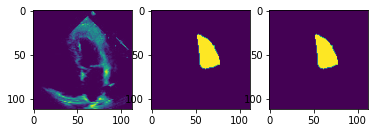

In [5]:
for i, ele in zip(range(0, 1), train_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0]
    img_label = ele[1]
    img_weights = ele[2]
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()

0
112
(112, 112)


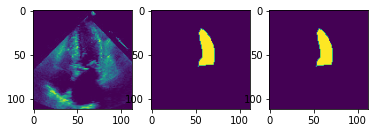

In [6]:
for i, ele in zip(range(0, 1), val_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0]
    img_label = ele[1]
    img_weights = ele[2]
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()

0
112
(112, 112)


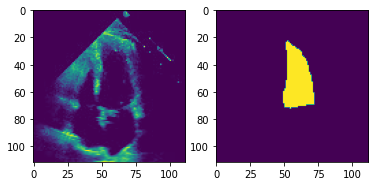

tf.Tensor(
[b'D:\\AIMedic\\FinalProject_echocardiogram\\echoC_Dataset\\echonet_dynamic\\EchoNet-Dynamic\\Cases/0X100CF05D141FF143\\0X100CF05D141FF143_ES.mhd'
 b'D:\\AIMedic\\FinalProject_echocardiogram\\echoC_Dataset\\echonet_dynamic\\EchoNet-Dynamic\\Cases/0X100CF05D141FF143\\0X100CF05D141FF143_ES_gt.mhd'], shape=(2,), dtype=string)


In [7]:
for i, ele in zip(range(0, 1), test_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0]
    img_label = ele[1]
    img_id = ele[2]
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    plt.show()
    print(img_id)

In [8]:
augmentor = Aug(config)
augmented_train_gen = augmentor.add_augmentation(train_gen)

0
112
(112, 112)


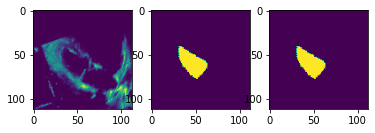

In [9]:
for i, ele in zip(range(0, 1), augmented_train_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0]
    img_label = ele[1]
    img_weights = ele[2]
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()

In [10]:
pre_processor = PreprocessorTF(config)
pre_processed_train_gen, n_iter = pre_processor.add_preprocess(train_gen, len(augmented_train_gen))

0
8
(8, 128, 128, 1)
1.0
1.0
0.9090909090909091


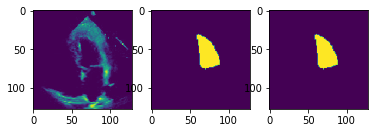

In [11]:
for i, ele in zip(range(0, 1), pre_processed_train_gen):
    print(i)
    print(len(ele[0]))
    print(ele[0].numpy().shape)
    first_img = ele[0][0]
    img_label = ele[1][0]
    img_weights = ele[2][0]
    fig, ax = plt.subplots(1, 3)
    print(np.amax(first_img))
    print(np.amax(img_label))
    print(np.amax(img_weights))
    ax[0].imshow(first_img)
    ax[1].imshow(img_label)
    ax[2].imshow(img_weights)
    plt.show()